# Biodata
* Nama: **Virgiawan Teguh Kusuma**
* Email: **181240000833@unisnu.ac.id**
* Domisili: **Kabupaten Jepara, Jawa Tengah**

# Domain Proyek
Pada bagian ini, Anda menguraikan secara singkat informasi mengenai pilihan domain yang akan diselesaikan permasalahannya. 
Sebagai contoh, Anda memilih domain telekomunikasi. Anda dapat menguraikan bagian ini dengan pendekatan berikut:
- Sertakan informasi atau latar belakang yang relevan mengenai pemilihan domain ini.
- Jelaskan mengapa dan bagaimana masalah dalam domain yang Anda pilih tersebut harus diselesaikan.
- Sertakan pula hasil riset terkait atau referensi yang relevan. Anda dapat menggunakan [tautan](https://scholar.google.com/) untuk menuliskan referensi atau rujukan.

# Business Understanding
Bagian ini menjelaskan proses klarifikasi masalah dan mengajukan minimal satu solusi untuk menyelesaikan permasalahan. Bagian laporan ini mencakup:

## Problem Statements
Tuliskan problem statement Anda di sini. Anda dapat menggunakan kalimat tanya untuk mendefinisikan bagian ini.

## Goals
Tuliskan dan jelaskan goal proyek yang ingin Anda capai di bagiani ini. Anda dapat menggunakan bullet point jika memiliki lebih dari satu goals proyek.

## Solution statements
Sampaikan solusi yang Anda ajukan untuk menyelesaikan permasalahan di sini. Misalnya, Anda mengajukan dua algoritma machine learning sebagai solusi permasalahan, yaitu Random Forest dan Boosting Algorithm. Jelaskan secara singkat mengenai kedua algoritma ini. 
Sebagai contoh:
- **Random Forest**. Kalimat selanjutnya menjelaskan informasi atau cara kerja algoritma ini. Selain itu, dapat juga Anda tambahkan kelebihan dan kekurangan algoritma ini.
- **Boosting Algorithm**. Sama dengan di atas. 

# Data Understanding
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data).

Selanjutnya, uraikanlah seluruh variabel atau fitur pada data. Sebagai contoh:  

Variabel-variabel pada Restaurant UCI dataset adalah sebagai berikut:
- accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
- cuisine : merupakan jenis masakan yang disajikan pada restoran.
- dst

# Load Library

## Load Google Drives

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Library Lainnya

In [68]:
# Import library
import pandas as pd
import numpy as np 
import zipfile
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Load Dataset

## Load dataset & Ekstraksi file yang masih berbentuk zip dari GDrive

In [69]:
song = '/content/drive/MyDrive/songDataset2.zip'
songRef = zipfile.ZipFile(song, 'r')
songRef.extractall('/content')
songRef.close()

## Inisialisasi variable untuk membuat Dataframe

In [70]:
df = pd.read_csv('song_data.csv')
df

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...
1116604,276e43ad698705e5011e5091f367d951b21246f5,SOWTYVO12AB0180BDA,8,Surf Wax America,Weezer,Surf Wax America - Weezer
1116605,276e43ad698705e5011e5091f367d951b21246f5,SOWZHOY12A6701F9FC,1,Kill The King,Megadeth,Kill The King - Megadeth
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,You Think I Ain\'t Worth A Dollar_ But I Feel ...,Queens Of The Stone Age,You Think I Ain\'t Worth A Dollar_ But I Feel ...
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Superbeast,Rob Zombie,Superbeast - Rob Zombie


# Data Preprocessing

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116609 entries, 0 to 1116608
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1116609 non-null  object
 1   song_id       1116609 non-null  object
 2   listen_count  1116609 non-null  int64 
 3   title         1116609 non-null  object
 4   artist        1116609 non-null  object
 5   song          1116609 non-null  object
dtypes: int64(1), object(5)
memory usage: 51.1+ MB


In [72]:
listen_count = df['listen_count']
listen_count.describe()

count    1.116609e+06
mean     3.290769e+00
std      7.202534e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.200000e+02
Name: listen_count, dtype: float64

In [73]:
print('Jumlah user:', len(df['user_id'].unique()))
print('Jumlah lagu:', len(df['song'].unique()))
print('Jumlah didengar:', len(listen_count))

Jumlah user: 66346
Jumlah lagu: 9952
Jumlah didengar: 1116609


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


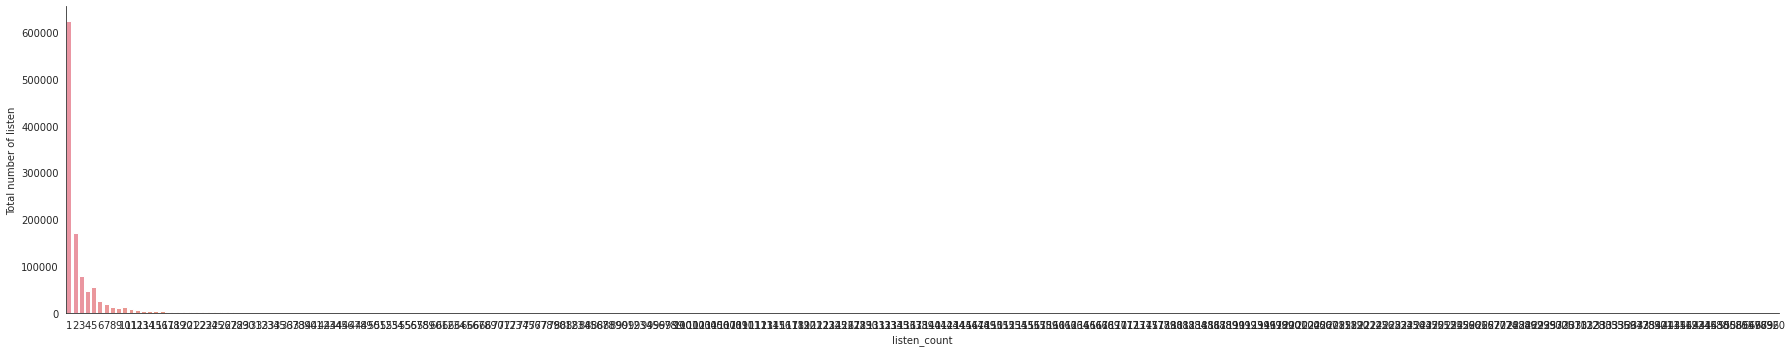

In [74]:
with sns.axes_style('white'):
    g = sns.catplot("listen_count", data=df, aspect=5.0, kind='count')
    g.set_ylabels("Total number of listen")

In [75]:
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
artist          0
song            0
dtype: int64

In [76]:
cols = [5,2]
listen_count = df[df.columns[cols]]
listen_count

,song,listen_count
0,The Cove - Jack Johnson,1
1,Entre Dos Aguas - Paco De Lucia,2
2,Stronger - Kanye West,1
3,Constellations - Jack Johnson,1
4,Learn To Fly - Foo Fighters,1
...,...,...
1116604,Surf Wax America - Weezer,8
1116605,Kill The King - Megadeth,1
1116606,You Think I Ain\'t Worth A Dollar_ But I Feel ...,7
1116607,Superbeast - Rob Zombie,1


In [77]:
print('Jumlah didengar kurang dari 100 :', listen_count['listen_count'].le(10).sum())
listen_count['listen_count'].shape

Jumlah didengar kurang dari 100 : 1054898


(1116609,)

In [78]:
listen_count = listen_count[listen_count['listen_count']<=100]
listen_count.shape

(1115967, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


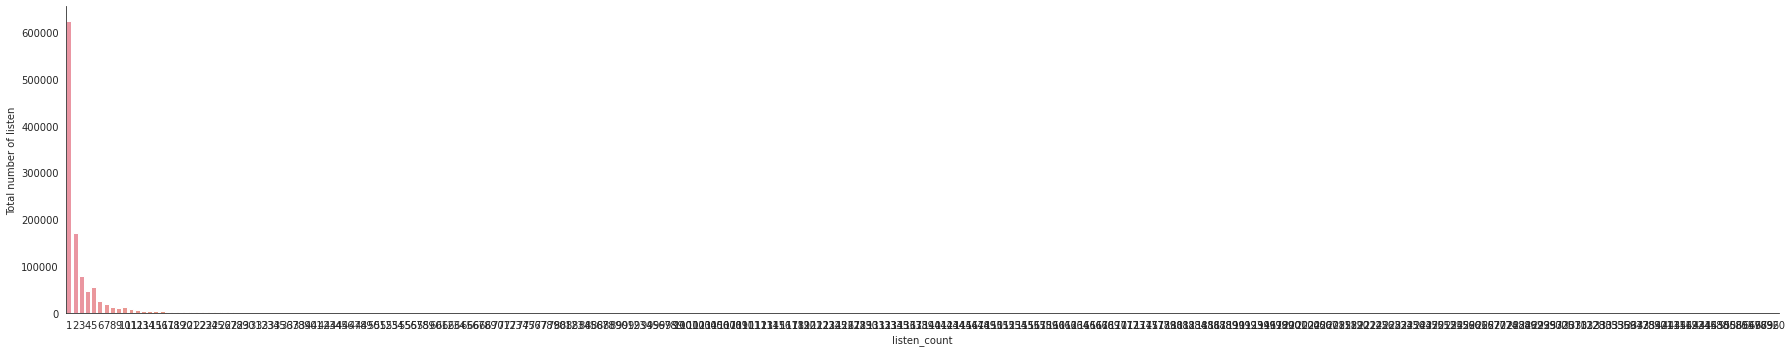

In [79]:
with sns.axes_style('white'):
    g = sns.catplot("listen_count", data=df, aspect=5.0, kind='count')
    g.set_ylabels("Total number of listen")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed78b61490>]],
      dtype=object)

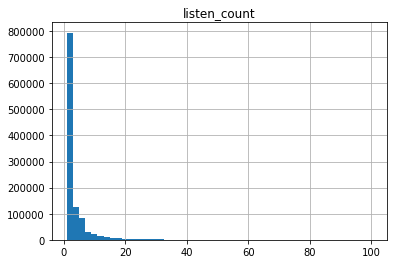

In [80]:
listen_count.hist(bins=50)

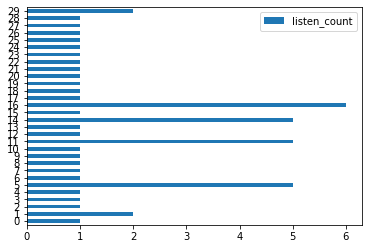

In [81]:
listen_count.head(30).plot(kind='barh')

In [82]:
df

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...
1116604,276e43ad698705e5011e5091f367d951b21246f5,SOWTYVO12AB0180BDA,8,Surf Wax America,Weezer,Surf Wax America - Weezer
1116605,276e43ad698705e5011e5091f367d951b21246f5,SOWZHOY12A6701F9FC,1,Kill The King,Megadeth,Kill The King - Megadeth
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,You Think I Ain\'t Worth A Dollar_ But I Feel ...,Queens Of The Stone Age,You Think I Ain\'t Worth A Dollar_ But I Feel ...
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Superbeast,Rob Zombie,Superbeast - Rob Zombie


In [83]:
new_df = df[df.listen_count >= 100]
new_df

,user_id,song_id,listen_count,title,artist,song
529,43683da3c6c5a93c7938ff550faf0d039a9a639a,SOUEAYG12A6D4FE4AF,126,Fools,The Dodos,Fools - The Dodos
1509,5d5e0142e54c3bb7b69f548c2ee55066c90700eb,SOEKNHF12A3F1E9B8E,140,Times,Tenth Avenue North,Times - Tenth Avenue North
4983,332de6dcfc5b597500a661ab51a84653705b492b,SOBONKR12A58A7A7E0,123,You\'re The One,Dwight Yoakam,You\'re The One - Dwight Yoakam
9743,e0eeff31c4975103c873b118626fd94bd90564f5,SOKENKR12AB01828F7,117,Interactive Halloween Bear,Restiform Bodies,Interactive Halloween Bear - Restiform Bodies
10559,aa80992e5d8457f42aea6ab238e9ad3c346fcaac,SOFZWTX12A8C138B1D,108,Id Die Without You,P.M. Dawn,Id Die Without You - P.M. Dawn
...,...,...,...,...,...,...
1114836,5a95125a3948eca3ca8eb702ef55cb1ad9080a17,SOBSYVE12A6D4F84D1,117,Back Home (Album Version),Fort Minor (Featuring Common And Styles Of Bey...,Back Home (Album Version) - Fort Minor (Featur...
1114844,5a95125a3948eca3ca8eb702ef55cb1ad9080a17,SOKENKR12AB01828F7,125,Interactive Halloween Bear,Restiform Bodies,Interactive Halloween Bear - Restiform Bodies
1115289,afefcebbf58876459ae45e8a0b76aaf591f38791,SOCZHUU12A6310DA5B,124,It Don\'t Matter,Donavon Frankenreiter,It Don\'t Matter - Donavon Frankenreiter
1115910,93c388dea59ec21ecca9bd197fd1ca549e10c424,SOCCOOK12A8C13EF91,101,Unholy Confessions,Avenged Sevenfold,Unholy Confessions - Avenged Sevenfold


# Model Development

## popularity

In [84]:
listen_count_popularity = listen_count.groupby('song')['listen_count'].count().sort_values(ascending=False)
listen_count_popularity

song
Sehr kosmisch - Harmonia                                   5969
Undo - Björk                                               5270
You\'re The One - Dwight Yoakam                            4781
Dog Days Are Over (Radio Edit) - Florence + The Machine    4536
Revelry - Kings Of Leon                                    4312
                                                           ... 
Bendable Poseable - Hot Chip                                 16
Marching Theme - Neutral Milk Hotel                          15
Trahison - Vitalic                                           15
Younger Than Springtime - William Tabbert                    12
Hubcap - Sleater-kinney                                      12
Name: listen_count, Length: 9952, dtype: int64

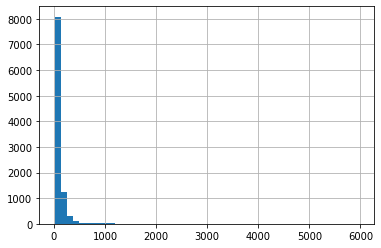

In [85]:
listen_count_popularity.hist(bins=50)

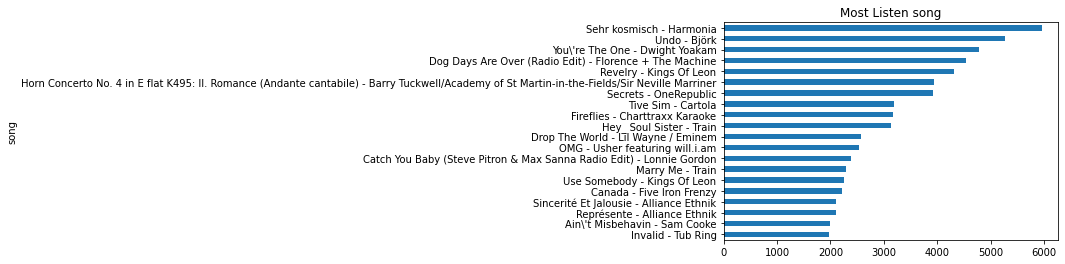

In [86]:
listen_count_popularity.head(20).sort_values().plot(kind='barh',
                                                  title='Most Listen song')

## Content-Based Filtering

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tfidf_artist = tf.fit_transform(new_df['artist']) 
 
tfidf_artist.shape

(656, 734)

In [88]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(tfidf_artist)

In [90]:
cs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [92]:
# Membuat dataframe dari variabel cosine_sim 
# dengan baris dan kolom berupa nama resto
cs_df = pd.DataFrame(cs, index=new_df['title'],
                             columns=new_df['title'])
print('Shape:', cs_df.shape)

# Melihat similarity matrix pada setiap resto
cs_df.sample(10, axis=1).sample(10, axis=0)

Shape: (656, 656)


title,What They Call Him (Skit),You\'re The One,Undo,The Ghost Of You (Album Version),Addams Groove,Halo,Wait & See (Gucci Soundsystem Remix),You\'re The One,Microfoni Assassini (2005 Digital Remaster),A Ti
title,,,,,,,,,,
Fire Bomb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Have Faith In Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ain\'t Misbehavin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Electric Avenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sehr kosmisch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bleed It Out [Live At Milton Keynes],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Own Worst Enemy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
def song_recommendations(title, similarity_data=cs_df, 
                         items=new_df[["title","artist"]], k=10):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    book_title : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan 
    # partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar judul buku yang dicari 
    # tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [96]:
title = 'Addams Groove'
song_recommendation = song_recommendations(title)
recommendation_listen = pd.merge(song_recommendation, popular_title, on='title')
recommendation_listen

ValueError: ignored